<a href="https://colab.research.google.com/github/Glifoyle/test-repo/blob/master/Copy_of_5_1_CNN_%E7%94%BB%E5%83%8F%E3%83%95%E3%82%A3%E3%83%AB%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 目的：画像フィルタ処理を理解する

### 概要：CNN（Convolutional Neural Network：畳み込みニューラルネットワーク）の基礎として，画像フィルタ処理（畳み込み処理）を体験する

<br>
&copy; 2021-2024 Hiro Kimura
<br>

### ポイント：

-  テスト画像に対して，以下の画像フィルタ処理（**畳み込み演算**）を行い，その効果を確認する
  - 平滑フィルタ
  - ソーベルフィルタ（一次微分フィルタ）
  - ラプラシアンフィルタ（二次微分フィルタ）


- 使用するデータ：
  - Google Driveの作業ディレクトリに保存した以下のファイル<br>
  './Lenna_test_image_gray.png'<br>
  （画像処理の学習で標準的なテスト画像である）




### 実習手順
1. 実習環境の構築
1. データを準備する
  - テスト画像データの読み込む
  - 表示して確認
1. 画像フィルタ処理を実施
  - 各種フィルタ処理
  - 処理後の画像を表示し効果を確認


# 実習環境を構築する

- Google Driveをマウントする
- フォルダを作成する
- テスト画像ファイルを確認する



In [1]:
# pythonのバージョン確認
# ! python --version

### Google Driveをマウントする

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### フォルダを作成する

In [4]:
# # 作業用フォルダを作成
# # !mkdir -p '/content/drive/MyDrive/practice/chap_cnn'
# %cd '/content/drive/MyDrive/practice/chap_cnn'
# !pwd

In [5]:
# 作業用フォルダを作成
import os

chap_dir = "/content/drive/MyDrive/practice/chap_cnn"
if not os.path.exists(chap_dir):
    # os.mkdir(chap_dir)
    os.makedirs(chap_dir)

os.chdir(chap_dir)
os.getcwd()

'/content/drive/MyDrive/practice/chap_cnn'

### テスト画像ファイルを読み込んで表示する
- 以下のセルを実行して、Google Driveの 作業フォルダに，テスト画像ファイル（Lenna_test_image_gray.png）をアップロードする
- ファイルの存在を確認する

In [6]:
from google.colab import files

uploaded = files.upload()

Saving Lenna_test_image_gray.png to Lenna_test_image_gray.png


In [7]:
# 画像が格納されているディレクトリを確認する
! ls ./

Lenna_test_image_gray.png


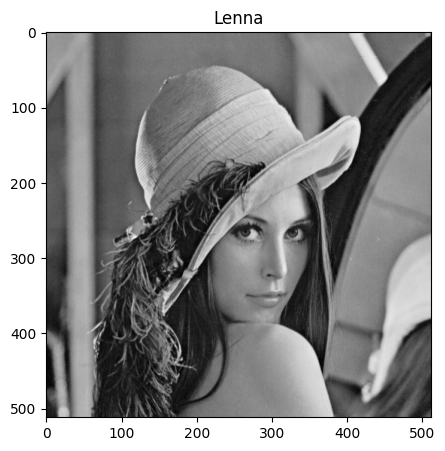

In [8]:
# ライブラリを読み込む
import matplotlib.pyplot as plt

# 画像ファイル名、パス
img_file = "./Lenna_test_image_gray.png"

# 画像を読込み配列格納
img = plt.imread(img_file)

# 図の大きさをインチ単位で指定する
plt.figure(figsize=(5,5))

# 画像表示（グレースケール画像として）
plt.imshow(img, cmap = "gray")

# 画像のタイトルをつける（Lennaさん）
plt.title("Lenna")

# 画面に表示する
plt.show()

# 画像フィルタ処理を行う


In [9]:
# 0から255の値は整数にして出力
# val:  実数値
def check_range(val):
    if val <= 0:
        val = 0
    elif val > 255:
        val = 255
    return int(val)

In [11]:
from PIL import Image
import numpy as np

"""
src_img:  path to img_file
filter:    'Average' or 'Sobel' or 'Laplacian'
kernel:    filter kernel
"""
def img_filtering(src_img, filter, kernel):

    # オリジナルと同じ大きさで空の画像を生成
    width, height = src_img.size
    dst_img = Image.new("RGB", (width, height)) # 処理後の画像データの入れ物

    # フィルタ（カーネル）のパラメータ値
    f = kernel
    # if filter == 'Average': # 平滑フィルタ（平均値フィルタ）
    #   f = [1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9]
    # elif filter == 'Sobel': # 一次微分フィルタ（縦ソーベルフィルタ）
    #   f = [-1, 0, 1, -2, 0, 2, -1, 0, 1]
    # elif filter == 'Laplacian': # 二次微分フィルタ（ラプラシアンフィルタ）
    #   f = [0, -1, 0, -1, 5, -1, 0, -1, 0]

    # フィルター処理
    pixels = np.array(src_img)    # height x width x 3(rgb)/1(gray)の一次元配列 pixels.shape => (512, 512)
    p = np.zeros((9, 3))    # フィルタ適用領域(9pixels) x 3(rgb)/1(gray)の配列 p.shape => (9, 3)

    # フィルタ処理
    for y in range(1, height-1):
        for x in range(1, width-1):

            p[0] = pixels[y-1][x-1]
            p[1] = pixels[y+0][x-1]
            p[2] = pixels[y+1][x-1]
            p[3] = pixels[y-1][x+0]
            p[4] = pixels[y+0][x+0]
            p[5] = pixels[y+1][x+0]
            p[6] = pixels[y-1][x+1]
            p[7] = pixels[y+0][x+1]
            p[8] = pixels[y+1][x+1]

            # 畳み込み演算
            for i in range(9):
                p[i] = p[i]*f[i]
            pix_val = np.sum(p, 0)

            # 画素の値を0-255の範囲に補正
            r, g, b = map(check_range, pix_val)

            # # 処理後の画像データを作成
            dst_img.putpixel((x, y), (r, g, b, 255))

    return dst_img


Elapsed time：14.52


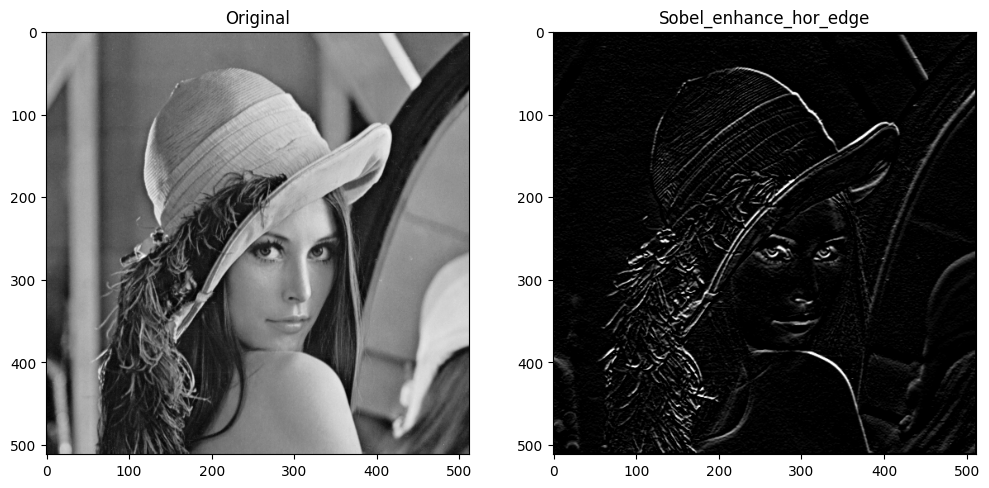

In [14]:
from PIL import Image
import time

# 画像の読み込み
src_img = Image.open(img_file)

# 画像はグレースケール
c_map = 'gray'

# 画像フィルタ処理
# (1) 平滑フィルタ（平均値フィルタ）
filter = "Average"
kernel = [1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9]

# (2) 二次微分フィルタ（ラプラシアンフィルタ）
#filter = "Laplacian"
#kernel = [0, -1, 0, -1, 5, -1, 0, -1, 0]

# (3) 一次微分フィルタ（横エッジ検出・縦変化強調：ソーベルフィルタ）
filter = "Sobel_enhance_hor_edge"
kernel = [-1, 0, 1, -2, 0, 2, -1, 0, 1]

# (4) 一次微分フィルタ（縦エッジ検出・横変化強調：ソーベルフィルタ）
# filter = "Sobel_enhance_ver_edge"
# kernel = [-1, -2, -1, 0, 0, 0, 1, 2, 1]

# 図の大きさをインチ単位で指定する
fig = plt.figure(figsize=(12, 6))

# フィギュア内にサブプットを2つ配置する
ax1 = fig.add_subplot(121) # 1行2列の1番目
ax2 = fig.add_subplot(122) # 1行2列の2番目

# オリジナル画像を表示する
ax1.set_title('Original')
ax1.imshow(src_img, cmap=c_map)

# 学習開始のタイムスタンプ
s = time.time()

# 画像フィルタ処理
dest_img = img_filtering(src_img, filter, kernel)

# 学習終了のタイムスタンプ
e = time.time()

# 学習の所要時間
proc = e - s
print('Elapsed time：{:.2f}'.format(proc))

# フィルタ処理後の画像を表示する
ax2.set_title(filter)
ax2.imshow(dest_img, cmap=c_map)

plt.show()

# まとめ
画像フィルタ処理の原理と効果が理解できた
- 畳み込み処理が理解できた
- フィルタ（カーネル）のパラメータが理解できた
- カーネルのパラメータ値と畳み込み処理の効果が理解できた
